INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application de la méthode du codage prédicitif sur une image

In [15]:
import numpy as np
import matplotlib.pyplot as py
import time as time 
import os
import psutil

Lecture d'une image, conversion en tons de gris, conversion de l'image en float pour les calculs, et affichage 

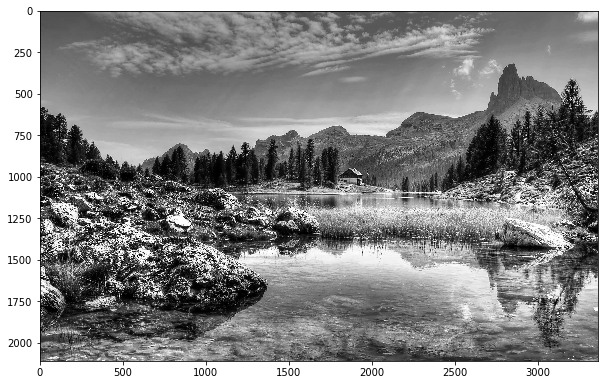

In [16]:
def rgb2gray(rgb):
    return np.dot(rgb[:,:], [0.299, 0.587, 0.114])

fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('./imagestest/origin(3360x2108).jpg')
image=imagelue.astype('float')
image=rgb2gray(image)
imageout=image.astype('uint8')
py.imshow(imageout,cmap = py.get_cmap('gray'))
py.show()

Histogramme des tons de gris. 

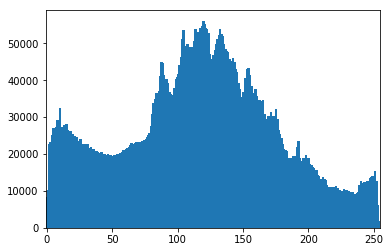

In [17]:
hist, intervalles = np.histogram(imageout, bins=256)
py.bar(intervalles[:-1], hist, width = 2)
py.xlim(min(intervalles)-1, max(intervalles))
py.show() 

Duplication des colonnes et rangées pour les frontières.

Matrice de prédiction. Un pixel est prédit à partir de ses 3 voisins.

Calcul des prédictions et des erreurs de prédictions.

In [18]:
startTimer = time.time()
col=image[:,0]
image = np.column_stack((col,image))
col=image[:,len(image[0])-1]
image = np.column_stack((col,image))
row=image[0,:]
image = np.row_stack((row,image))
row=image[len(image)-1,:]
image = np.row_stack((row,image))

matpred = [[0.33,0.33],[0.33,0.0]]

erreur = np.zeros((len(image)-2,len(image[0])-2))
imagepred = np.zeros((len(image)-2,len(image[0])-2))
for i in range(1,len(image)-2):
    for j in range(1,len(image[0])-2):
        imagepred[i][j]=image[i-1][j-1]*matpred[0][0]+image[i-1][j]*matpred[0][1]+image[i][j-1]*matpred[1][0]
        erreur[i][j]=imagepred[i][j]-image[i][j]
endTimer = time.time()
predictifTime = endTimer-startTimer
print(predictifTime)

20.889039278030396


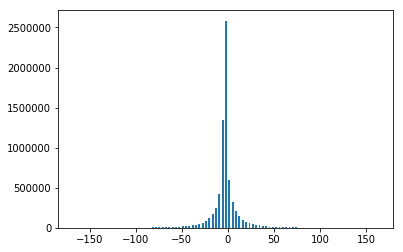

In [19]:
hist, intervalles = np.histogram(erreur, bins=100)
py.bar(intervalles[:-1], hist, width = 2)
py.xlim(min(intervalles)-1, max(intervalles))
py.show()  

Affichage de l'image prédite

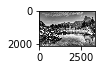

In [20]:
fig2 = py.figure(figsize = (1,1))
imageout=imagepred.astype('uint8')
py.imshow(imageout, cmap = py.get_cmap('gray'))
py.show()

Image des erreurs (amplifiées pour une meilleure visibilité)

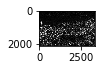

In [21]:
fig3 = py.figure(figsize = (1,1))
erreur=abs(erreur)*5
imageout=erreur.astype('uint8')
py.imshow(imageout, cmap = py.get_cmap('gray'))
py.show()

HUFFMAN

In [22]:
from anytree import Node, RenderTree, PreOrderIter, AsciiStyle


#transformer l'image en string
imageout = imageout.flatten().astype('str')
Message = ''.join(imageout)



In [23]:
StartTimer1 = time.time()
#Liste qui sera modifié jusqu'à ce qu'elle contienne seulement la racine de l'arbre
ArbreSymb =[[Message[0], Message.count(Message[0]), Node(Message[0])]] 
#dictionnaire obtenu à partir de l'arbre.
dictionnaire = [[Message[0], '']]
nbsymboles = 1

#Recherche des feuilles de l'arbre
for i in range(1,len(Message)):
    if not list(filter(lambda x: x[0] == Message[i], ArbreSymb)):
        ArbreSymb += [[Message[i], Message.count(Message[i]),Node(Message[i])]]
        dictionnaire += [[Message[i], '']]
        nbsymboles += 1
        
longueurOriginale = np.ceil(np.log2(nbsymboles))*len(Message)   

#Affichage des feuilles trouvées. Les feuilles sont triées pour la construction de l'arbre selon l'algorithme Huffman
ArbreSymb = sorted(ArbreSymb, key=lambda x: x[1])

#Création de l'arbre


while len(ArbreSymb) > 1:
    #Fusion des noeuds de poids plus faibles
    symbfusionnes = ArbreSymb[0][0] + ArbreSymb[1][0] 
    #Création d'un nouveau noeud
    noeud = Node(symbfusionnes)
    temp = [symbfusionnes, ArbreSymb[0][1] + ArbreSymb[1][1], noeud]
    #Ajustement de l'arbre pour connecter le nouveau avec ses parents 
    ArbreSymb[0][2].parent = noeud
    ArbreSymb[1][2].parent = noeud
    #Enlève les noeuds fusionnés de la liste de noeud à fusionner.
    del ArbreSymb[0:2]
    #Ajout du nouveau noeud à la liste et tri.
    ArbreSymb += [temp]
    #Pour affichage de l'arbre ou des sous-branches
      
    ArbreSymb = sorted(ArbreSymb, key=lambda x: x[1])  

#On traverse l'arbre des symboles par parcours préfix, et on construit un arbre semblable de codes binaires. Le premier enfant avec 0, le deuxième avec 1. Ensuite, on utilisera les 2 arbres pour construire le dictionnaire.


ArbreCodes = Node('')
noeud = ArbreCodes
#print([node.name for node in PreOrderIter(ArbreSymb[0][2])])
parcoursprefix = [node for node in PreOrderIter(ArbreSymb[0][2])]
parcoursprefix = parcoursprefix[1:len(parcoursprefix)] #ignore la racine

Prevdepth = 0 #pour suivre les mouvements en profondeur dans l'arbre
for node in parcoursprefix:  #Liste des noeuds 
    if Prevdepth < node.depth: #On va plus profond dans l'arbre, on met un 0
        temp = Node(noeud.name + '0')
        noeud.children = [temp]
        if node.children: #On avance le "pointeur" noeud si le noeud ajouté a des enfants.
            noeud = temp
    elif Prevdepth == node.depth: #Même profondeur, autre feuille, on met un 1
        temp = Node(noeud.name + '1')
        noeud.children = [noeud.children[0], temp]  #Ajoute le deuxième enfant
        if node.children: #On avance le "pointeur" noeud si le noeud ajouté a des enfants.
            noeud = temp
    else:
        for i in range(Prevdepth-node.depth): #On prend une autre branche, donc on met un 1
            noeud = noeud.parent #On remontre dans l'arbre pour prendre la prochaine branche non explorée.
        temp = Node(noeud.name + '1')
        noeud.children = [noeud.children[0], temp]
        if node.children:
            noeud = temp
        
    Prevdepth = node.depth    
         
    ArbreSymbList = [node for node in PreOrderIter(ArbreSymb[0][2])]
ArbreCodeList = [node for node in PreOrderIter(ArbreCodes)]

for i in range(len(ArbreSymbList)):
    if ArbreSymbList[i].is_leaf: #Génère des codes pour les feuilles seulement
        temp = list(filter(lambda x: x[0] == ArbreSymbList[i].name, dictionnaire))
        if temp:
            indice = dictionnaire.index(temp[0])
            dictionnaire[indice][1] = ArbreCodeList[i].name
            
MessageCode = []
longueur = 0 
for i in range(len(Message)):
    substitution = list(filter(lambda x: x[0] == Message[i], dictionnaire))
    MessageCode += [substitution[0][1]]
    longueur += len(substitution[0][1]) 
EndTimer1 = time.time()
HuffmanTime = EndTimer1-StartTimer1

#MEMOIRE, TEMPS Longueur en bits du message codé et celle de l'original
process = psutil.Process(os.getpid())
memoryInfo =(process.memory_info().rss) / float(2**20) 
print("memory used in Mbytes = {0}".format(memoryInfo)) 

TotalTime = HuffmanTime + predictifTime
print("execution time = {0}".format(TotalTime))

#print("Longueur = {0}".format(longueur))
#print("Longueur originale = {0}".format(longueurOriginale))

Ratio = 1 - (longueur/longueurOriginale) 
print("Taux de compression = {0}".format(Ratio))

memory used in Mbytes = 613.00390625
execution time = 68.7828357219696
Taux de compression = 0.19392227446600963
